# Diabetes Patients Prediction

## Problem Statement
The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset using logistics regression techniques.

## My approach for building a model:
1) Upload and analyze the data into jupyter notebook.
2) Perform Data Pre-processing like cleaning data, transforming data. Handling missing values, outliers and categorical veriables.
3) Spliting the available data in 80:20 ration to perform training and testing of the models.
4) Training and testing the models using different classification techniques like Linear Regression, LDA and KN Neighbour methods 5.with available data.
6) Chosing the model and classification techique with best accuracy, precision score, recall score and ROC AUC score.
7) Steps to improve the selected model's performance.

In [11]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and
Kidney Diseases.All patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
#uploading data into pandas dataset
df = pd.read_csv('F:/Data Science Videos/Meriskill_Internship/Project 2 MeriSKILL/diabetes.csv', header = 0)

In [3]:
# Looking at the available data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking number of rows and columns
df.shape

(768, 9)

In [5]:
# More info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No missing values detected

## Data Pre-Processing

In [6]:
# Performing EDD for numerical variables
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
#looking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# dropping duplicate
df = df.drop_duplicates()
#dropping NaN values
df = df.dropna()

In [5]:
df.shape

(768, 9)

## Plotting Categorical Variables

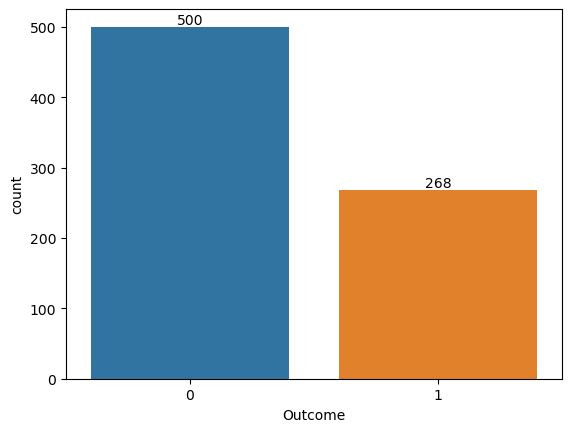

In [6]:
import matplotlib.pyplot as plt
ax = sns.countplot(data=df, x='Outcome')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

1) Number of Positive or 1 is 268
2) Number of Negative or 0 is 500

## Looking at numerical variables

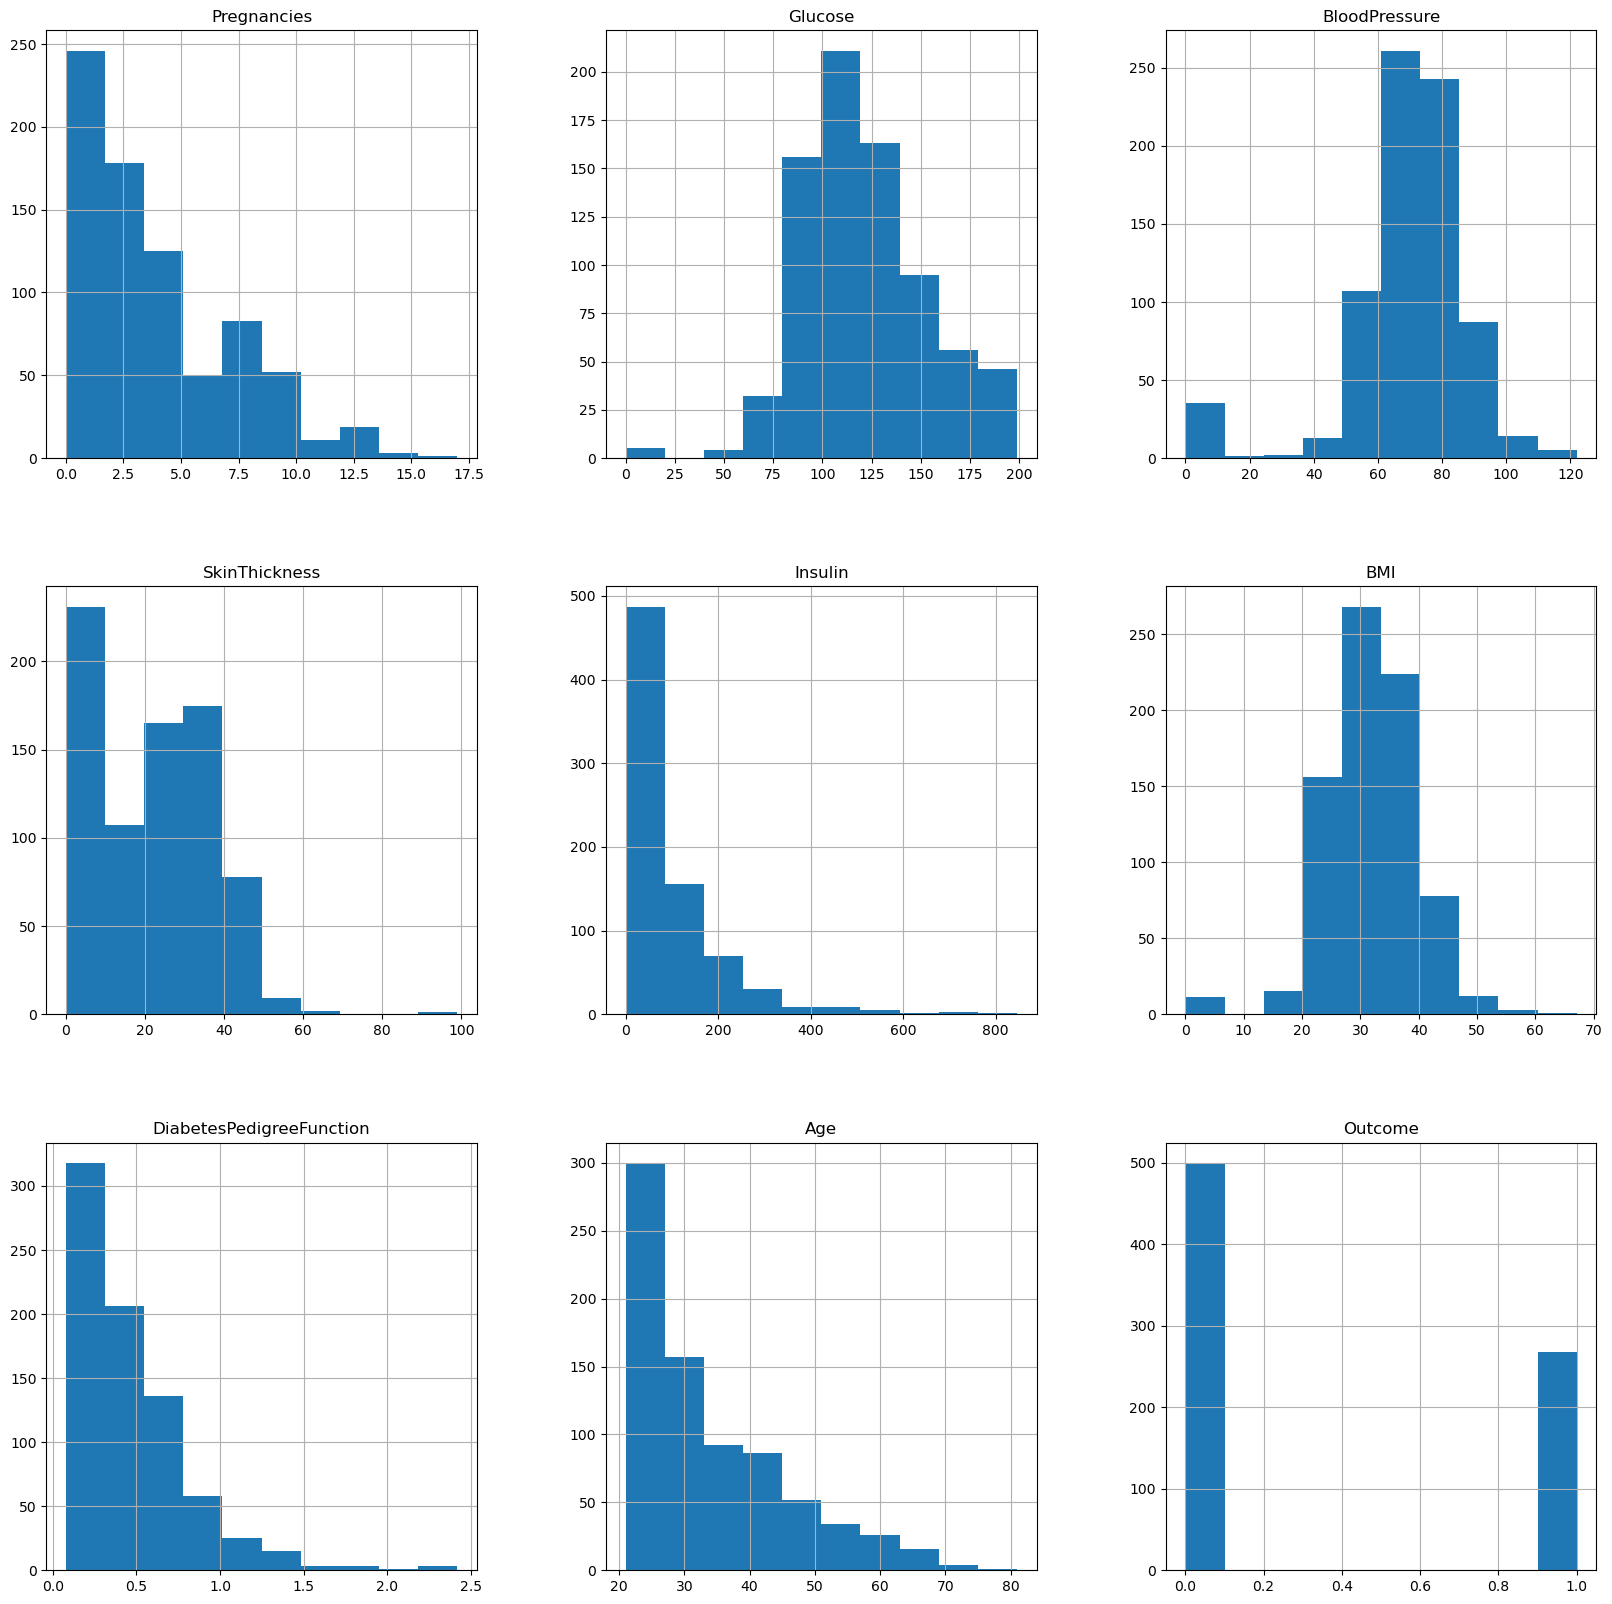

In [10]:
# plotting the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

1) Pregnancies, Insulin, Diabetes Pedigree function and Age predictor variable distribution appears to be positively skewed

## Plotting a Correlational Matrix

In [8]:
# for those who prefer looking at numbers
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


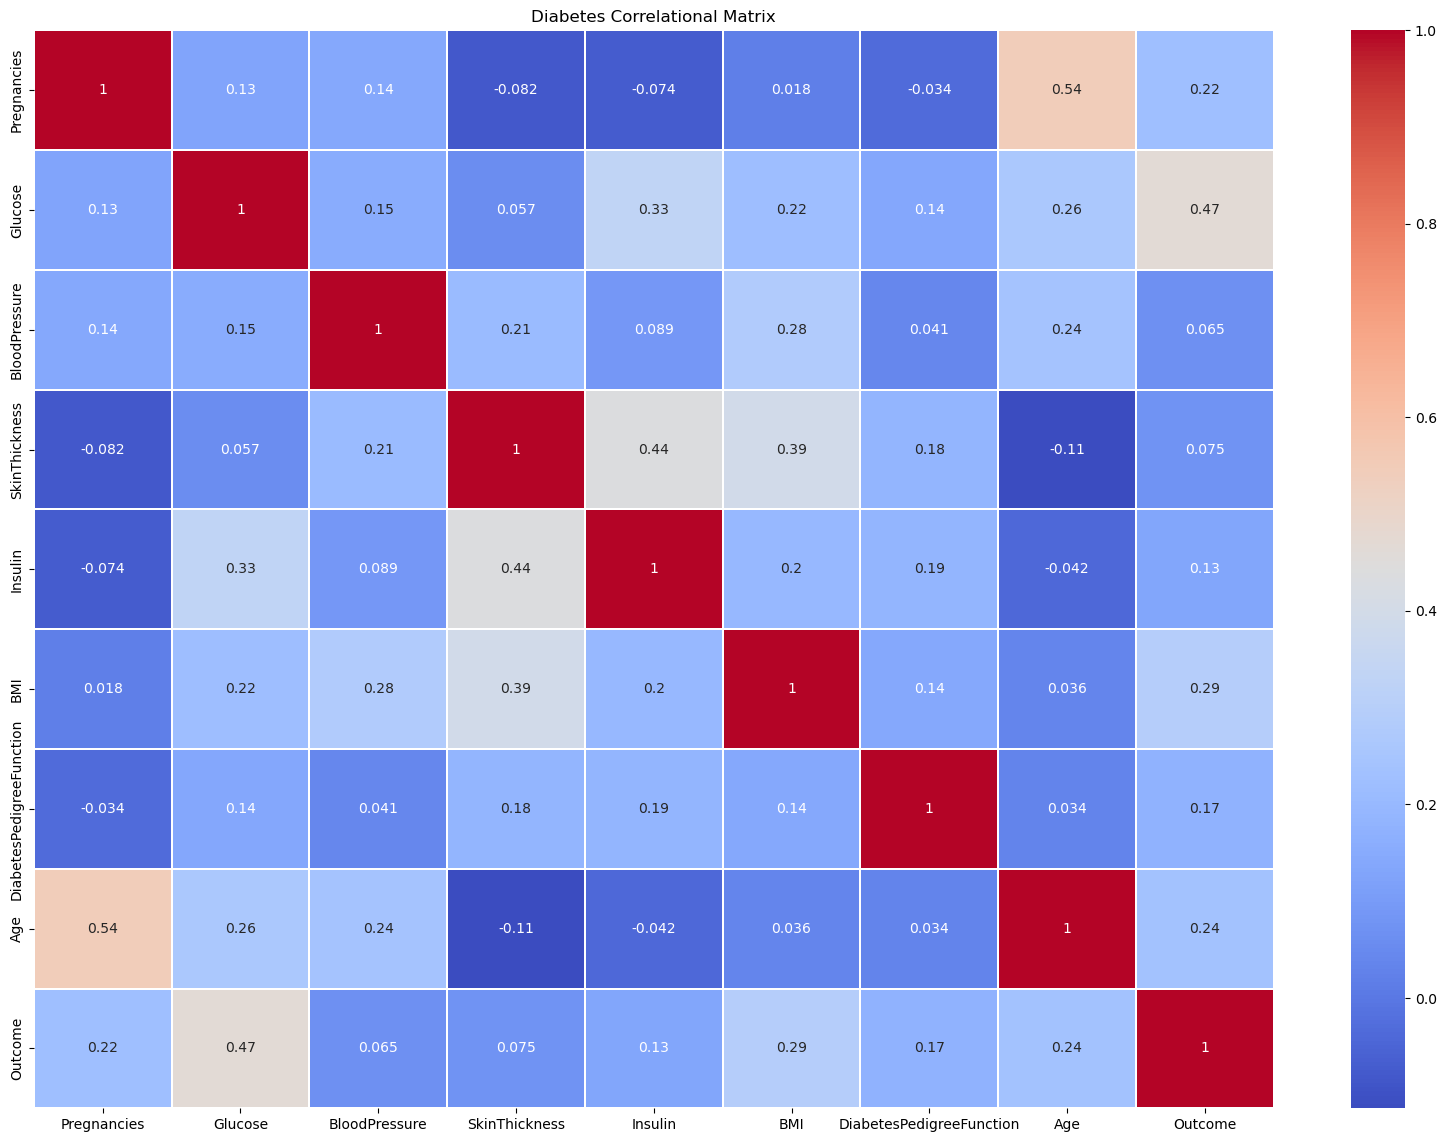

In [9]:
# for those who prefer visualization plotting a correlation heatmap
plt.figure(figsize = (20,14))
plt.title('Diabetes Correlational Matrix')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm", annot = True)
plt.show()

No higly correleted varables detected.

## Performing Test-Train Split

Splitting the data into test and train set in order to train the model using one set and validate its performance using other set.

In [12]:
# Creating X independent and Y dependent variables for regression model
X = df.loc[:,df.columns != 'Outcome'] # creating a variable X without class variable (Independent Variables)

In [13]:
# creating dependent variable Y with only class variable
Y = df['Outcome'] # Dependent Variable

Splitting the data into 80:20 ratio to validate the model performance on an unseen data

In [14]:
# Splitting the data in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# Analysing test and train data shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Standardizing the test and training set

In [15]:
#standardizing using standard scaler function
scaler=preprocessing.StandardScaler().fit(X_train) #standardizing and fitting the training set using standardscaler function
X_train_s=scaler.transform(X_train)
scaler=preprocessing.StandardScaler().fit(X_test) #standardizing and fitting the test set using standardscaler function
X_test_s=scaler.transform(X_test)

## Logistic Regression

### Training the model

In [16]:
# Importing the model in use
from sklearn.linear_model import LogisticRegression
# Training the model
clf_lrs=LogisticRegression()
clf_lrs.fit(X_train_s,y_train)

LogisticRegression()

### Predicting

In [17]:
# predicting 
y_pred=clf_lrs.predict(X_test_s)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

### Model Performance

In [18]:
# Model Evaluation
# creating confusion matrix
confusion_matrix(y_test,y_pred)

array([[94, 13],
       [18, 29]], dtype=int64)

In [19]:
# Checking accuracy
accuracy_lr = accuracy_score(y_test,y_pred)
accuracy_lr

0.7987012987012987

#### Model Accuracy-79.8%

#### Lets see if we can improve model performance using other classification techniques

## Random Forest

In [21]:
# importing model in use
from sklearn.ensemble import RandomForestClassifier

### Training the model

In [23]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rf_clf.fit(X_train_s,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

### Predicting

In [27]:
# predicting values
rf_clf.predict(X_test_s)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Model Performance

In [28]:
# Predicting X_test values and creating confusion matrix
confusion_matrix(y_test,rf_clf.predict(X_test_s))

array([[91, 16],
       [15, 32]], dtype=int64)

In [29]:
# Checking accuracy
accuracy_rfc = accuracy_score(y_test,rf_clf.predict(X_test_s))
accuracy_rfc

0.7987012987012987

In [32]:
# Checking train set accuracy
accuracy_score(y_train,rf_clf.predict(X_train_s))

1.0

#### Model Accuracy:79.8%

#### There seems to be no significant increase in model accuracy and additionaly the model seems to be overfitting the data. 

## Gradient Boosting Classifier

In [34]:
# Importing the model in use
from sklearn.ensemble import GradientBoostingClassifier

### Training the model

In [35]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train_s, y_train)

GradientBoostingClassifier()

In [39]:
# predicting values
gbc_clf.predict(X_test_s)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Model Performance

In [38]:
# Predicting X_test values and creating confusion matrix
confusion_matrix(y_test,gbc_clf.predict(X_test_s))

array([[92, 15],
       [15, 32]], dtype=int64)

In [37]:
## checking accuracy score for this model
accuracy_gbc = accuracy_score(y_test, gbc_clf.predict(X_test_s))
accuracy_gbc

0.8051948051948052

In [40]:
# Checking train set accuracy
accuracy_score(y_train,gbc_clf.predict(X_train_s))

0.9185667752442996

#### Model Accuracy:80%

#### Applying some parameter to this model to increase accuracy as well as avoid overfitting.

### Applying some parameters for to gradient boosting classifier to increase accuracy

In [41]:
# Applying learning rate = 0.02, n_estimators = 1000, tree depth 1
gbc_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)
gbc_clf2.fit(X_train_s, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [42]:
# predicting values
gbc_clf2.predict(X_test_s)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Model Perforamce

In [43]:
# Predicting X_test values and creating confusion matrix
confusion_matrix(y_test,gbc_clf2.predict(X_test_s))

array([[94, 13],
       [15, 32]], dtype=int64)

In [44]:
## checking accuracy score for this model
accuracy_gbc2 = accuracy_score(y_test, gbc_clf2.predict(X_test_s))
accuracy_gbc2

0.8181818181818182

In [45]:
# Checking train set accuracy
accuracy_score(y_train,gbc_clf2.predict(X_train_s))

0.8045602605863192

#### Model Accuracy:81.8%

In [48]:
from sklearn import metrics
# classification report of gradient boosting model
print(metrics.classification_report(y_test,gbc_clf2.predict(X_test_s)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



### Comparing accuracy of each model used

1) Logistic Regression Model(Test): 0.7987012987012987 | (train) : 1.0
2) Random Forest Classifier Model (Test) : 0.8051948051948052 | (train) : 0.9185667752442996
3) Gradient Boosting Classifier Model (Test): 0.7987012987012987| (train) : 1.0
4) Gradient Boosting Classifier Model 2 with Parameters (Test): 0.8181818181818182 | (train) : 0.8045602605863192

# Conclusion
The Gradient Boosting Classifier Model 2 with parameters gives highest test accuracy of 81% . The difference between the test and train accuracy is negligible therefor the model is not overfitting. Hence The Gradient Boosting Classifier Model 2 is the best model for this data.

# Steps to be taken to improve model performance are:
1) Collecting the missing values or the nan values in the dataset from the original source as much as possible because more accurate the data better the performance of the model
2) Collecting more fresh data from the source for this dataset as with more data we will be able to train the model better and hence increase performance.
3) We can also use feature selection methode to remove some predicter variables which do not have significant impact on dependent variable.
4) Finaly we can train the model with more number of hyper parameters in grid search to increase the model performance even further